- 1. ¿Cuál es la proporción de víctimas masculinas y femeninas en los delitos registrados?
- 2. ¿Cuáles son los departamentos con mayor número de delitos?
- 3. ¿Cuáles son los motivos más comunes que originaron el registro de un delito?
- 4. ¿Existe alguna relación entre el mes del año y la cantidad de delitos?
- 5. ¿Hay alguna relación entre el lugar y el género de la victima? Cual es el genero que mayormente ocupa el rol de la victima?, que proporcion hay para cada sexo?
- 6. ¿Hay alguna relación entre el lugar y el género del inculpado? Cual es el genero que mayormente ocupa el rol de inculpad@?, que proporcion hay para cada sexo?
- 7. Cantidad de hechos por año?, cuales son los 3 años con mayor numero de delitos?
- 8. Relacion entre la cantidad de inculpados y victimas por hecho
- 9. 3 principales clases de victimas y la relacion de sexo de cada una.
- 10. Relacion entre la edad y el sexo de la victima
- 11. Relacion entre la edad y el sexo del inculpado

## ¿Cuál es la proporción de víctimas masculinas y femeninas en los delitos registrados?

In [1]:
#Base de datos original
url_original='https://raw.githubusercontent.com/ianCristianAriel/proc_datos_proyecto_final_G3/visualizacion/datos/procesados/limpieza01_argentina_delitos.csv'
url1='https://raw.githubusercontent.com/ianCristianAriel/proc_datos_proyecto_final_G3/visualizacion/datos/procesados/preparacion01_datos_sexo_victima.csv'

In [8]:
import pandas as pd
df_original= pd.read_csv(url_original)
df_sexo_victimas=pd.read_csv(url1)
#Aca reemplazo los valores
df_sexo_victimas['sexo_victima'] = df_original['sexo_victima']
#Aca Agrego la columna
df_sexo_victimas['tipo_persona'] = df_original['tipo_persona']
#Filtro por victima
df_victima = df_sexo_victimas[df_sexo_victimas['tipo_persona'] == 'Víctima']



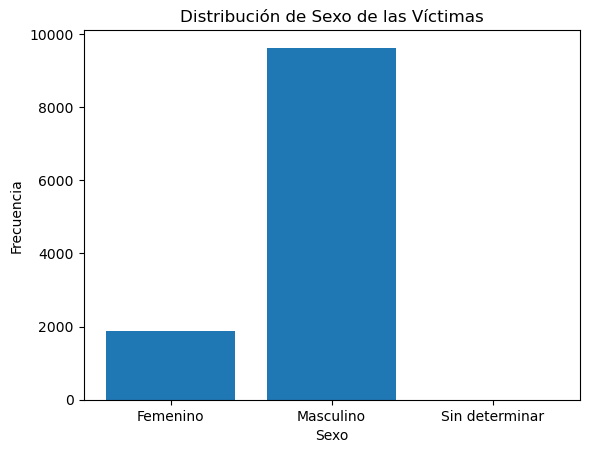

In [3]:
import matplotlib.pyplot as plt

# Obtener los valores únicos y sus frecuencias en la columna 'sexo_victima'
values, counts = df_victima['sexo_victima'].value_counts().sort_index().values, df_victima['sexo_victima'].value_counts().sort_index().index

# Crear el gráfico de barras
plt.bar(counts, values)

# Configurar los ejes y el título
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.title('Distribución de Sexo de las Víctimas')

# Mostrar el gráfico
plt.show()

## ¿Cuáles son los departamentos con mayor número de delitos?

In [4]:
url_original="https://raw.githubusercontent.com/ianCristianAriel/proc_datos_proyecto_final_G3/visualizacion/datos/procesados/limpieza01_argentina_delitos.csv"
url2='https://raw.githubusercontent.com/ianCristianAriel/proc_datos_proyecto_final_G3/visualizacion/datos/procesados/preparacion02_datos_deptos_delitos.csv'

In [31]:
import pandas as pd
df_original= pd.read_csv(url_original)
df_datos_deptos=pd.read_csv(url2)


#Aca reemplazo los valores
df_datos_deptos['localidad'] = df_original['localidad']

# Eliminar las filas duplicadas basadas en la columna 'Id_hecho'
df_datos_deptos_sin_duplicar = df_datos_deptos.drop_duplicates(subset='Id_hecho')

#Tomar los 10 lugares con mas cantidad de hechos delictivos

agrupado = df_datos_deptos_sin_duplicar.groupby('localidad').size()



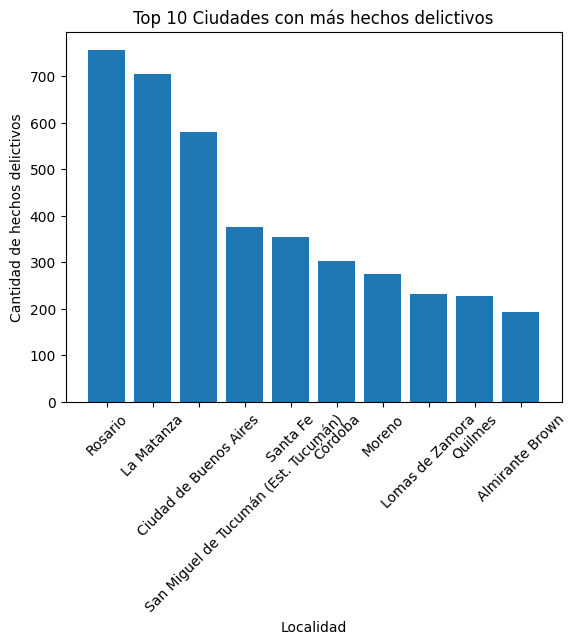

In [69]:
import pandas as pd
import matplotlib.pyplot as plt



# Agrupar por la columna 'localidad' y obtener la cuenta de ocurrencias
agrupado = df_datos_deptos_sin_duplicar.groupby('localidad').size()

# Seleccionar los diez grupos con mayor cantidad de ocurrencias
top_10 = agrupado.nlargest(10)

# Crear el gráfico de barras
plt.bar(top_10.index, top_10.values)
plt.xlabel('Localidad')
plt.ylabel('Cantidad de hechos delictivos')
plt.title('Top 10 Ciudades con más hechos delictivos')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()




## ¿Cuáles son los motivos más comunes que originaron el registro de un delito?

In [24]:
#Base de datos original
url_original='https://raw.githubusercontent.com/ianCristianAriel/proc_datos_proyecto_final_G3/visualizacion/datos/procesados/limpieza01_argentina_delitos.csv'
url3='https://raw.githubusercontent.com/ianCristianAriel/proc_datos_proyecto_final_G3/visualizacion/datos/procesados/preparacion03_datos_motivo_delitos.csv'

In [11]:
import pandas as pd
df_original= pd.read_csv(url_original)
df_motivos=pd.read_csv(url3)


#Aca reemplazo los valores
df_motivos['motivo_origen_registro'] = df_original['motivo_origen_registro']

# Eliminar las filas duplicadas basadas en la columna 'Id_hecho'
df_motivos = df_motivos.drop_duplicates(subset='Id_hecho')

df_motivos

agrupado_motivos = df_motivos.groupby('motivo_origen_registro').size()
print(agrupado_motivos)

motivo_origen_registro
Denuncia particular      3523
Intervención policial    7338
Orden judicial            200
Otros                      51
dtype: int64


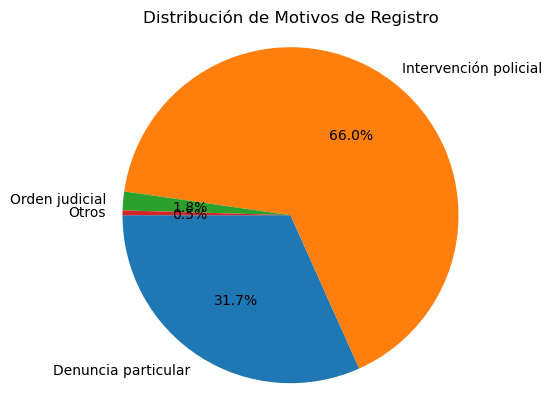

In [12]:
import pandas as pd
import matplotlib.pyplot as plt



# Agrupar por la columna 'motivo_origen_registro' y obtener el conteo de ocurrencias
agrupado_motivos = df_motivos.groupby('motivo_origen_registro').size()

# Crear el gráfico de torta
grafico = agrupado_motivos.plot.pie(autopct='%1.1f%%', startangle=180)

# Ajustar el aspecto del gráfico
plt.axis('equal')
plt.title('Distribución de Motivos de Registro')



# Mostrar el gráfico
plt.show()


## ¿Existe alguna relación entre el mes del año y la cantidad de delitos?

In [38]:
#Base de datos original

url_original='https://raw.githubusercontent.com/ianCristianAriel/proc_datos_proyecto_final_G3/visualizacion/datos/procesados/limpieza01_argentina_delitos.csv'

In [39]:
import pandas as pd
df_original= pd.read_csv(url_original)

# Eliminar las filas duplicadas basadas en la columna 'Id_hecho'
df_original_sin_duplicar = df_original.drop_duplicates(subset='Id_hecho')


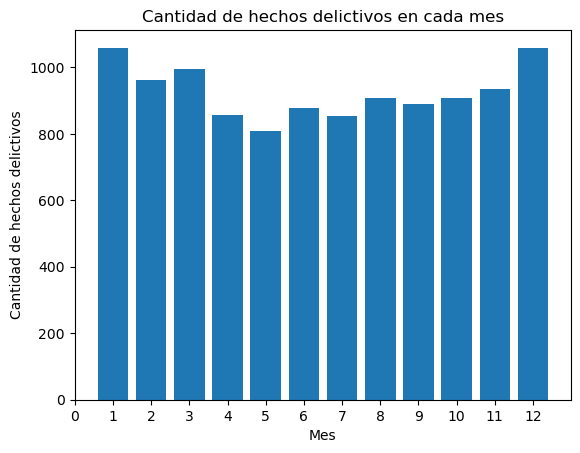

In [40]:
import pandas as pd
import matplotlib.pyplot as plt


# Agrupar por la columna 'mes' y obtener la cuenta de ocurrencias
agrupado = df_original_sin_duplicar.groupby('mes').size()

# Crear el gráfico de barras
plt.bar(agrupado.index, agrupado.values)
plt.xlabel('Mes')
plt.ylabel('Cantidad de hechos delictivos')
plt.title('Cantidad de hechos delictivos en cada mes')
plt.xticks([i for i in range(13)])

# Mostrar el gráfico
plt.show()

## ¿Hay alguna relación entre el lugar y el género de la victima? Cual es el genero que mayormente ocupa el rol de la victima?, que proporción hay para cada sexo?


In [104]:
#Base de datos original
url_original='https://raw.githubusercontent.com/ianCristianAriel/proc_datos_proyecto_final_G3/visualizacion/datos/procesados/limpieza01_argentina_delitos.csv'
url5='https://raw.githubusercontent.com/ianCristianAriel/proc_datos_proyecto_final_G3/visualizacion/datos/procesados/preparacion05_datos_lugar_genero_v_delito.csv'

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks",context="talk",palette="tab10")

df_original= pd.read_csv(url_original)
df_lugar_genero_v_delito=pd.read_csv(url5)

#Aca reemplazo los valores
df_lugar_genero_v_delito['tipo_lugar'] = df_original['tipo_lugar']
df_lugar_genero_v_delito['sexo_victima'] = df_original['sexo_victima']



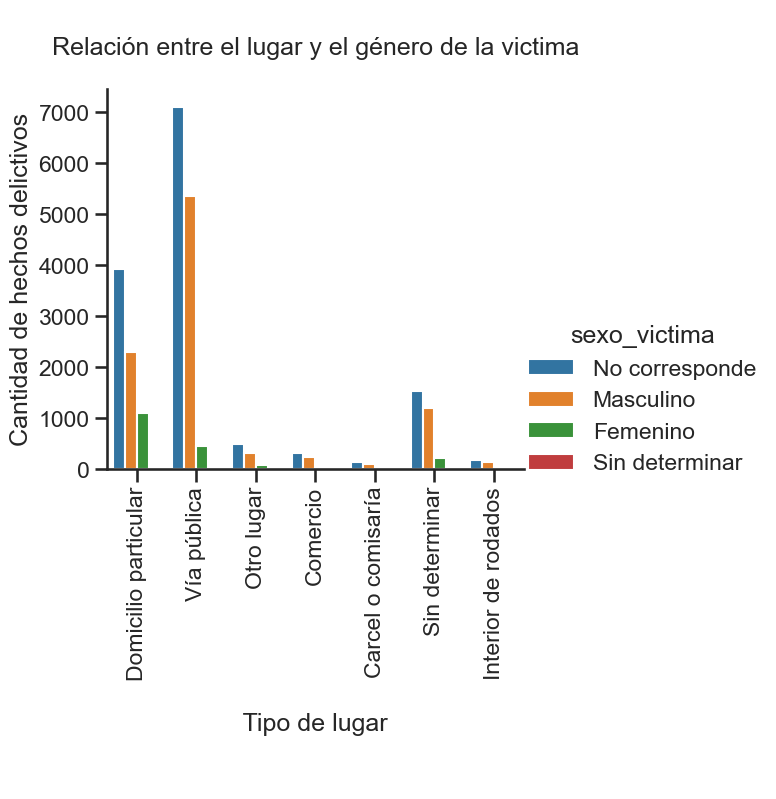

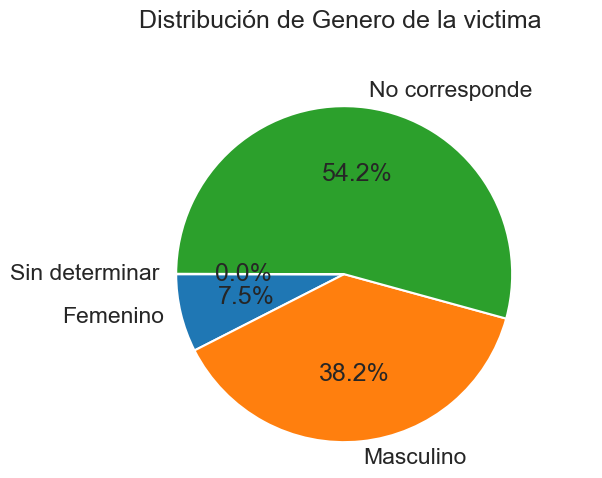

In [106]:
#crear gráfico de conteo para mostrar la relación entre el lugar y el género de la victima 
sns.catplot(x="tipo_lugar", data=df_lugar_genero_v_delito, kind="count", hue="sexo_victima",aspect=1.2)
plt.xlabel('\n Tipo de lugar \n\n')
plt.ylabel('Cantidad de hechos delictivos')
plt.title('\n Relación entre el lugar y el género de la victima \n')
plt.xticks(rotation=90)

plt.show()


# Agrupar por la columna 'sexo_victima' y obtener el conteo de ocurrencias
agrupado_genero = df_lugar_genero_v_delito.groupby('sexo_victima').size()

# Crear el gráfico de torta
grafico = agrupado_genero.plot.pie(autopct='%1.1f%%', startangle=180)

# Ajustar el aspecto del gráfico
plt.axis('equal')
plt.title('Distribución de Genero de la victima \n\n')



# Mostrar el gráfico
plt.show()



## ¿Hay alguna relación entre el lugar y el género del inculpado? Cual es el genero que mayormente ocupa el rol de inculpado?, que proporcion hay para cada sexo?

In [112]:
#Base de datos original
url_original='https://raw.githubusercontent.com/ianCristianAriel/proc_datos_proyecto_final_G3/visualizacion/datos/procesados/limpieza01_argentina_delitos.csv'
url6='https://raw.githubusercontent.com/ianCristianAriel/proc_datos_proyecto_final_G3/visualizacion/datos/procesados/preparacion06_datos_lugar_genero_i_delito.csv'

In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks",context="talk",palette="tab10")

df_original= pd.read_csv(url_original)
df_lugar_genero_i_delito=pd.read_csv(url6)

#Aca reemplazo los valores
df_lugar_genero_i_delito['tipo_lugar'] = df_original['tipo_lugar']
df_lugar_genero_i_delito['sexo_inculpado'] = df_original['sexo_inculpado']


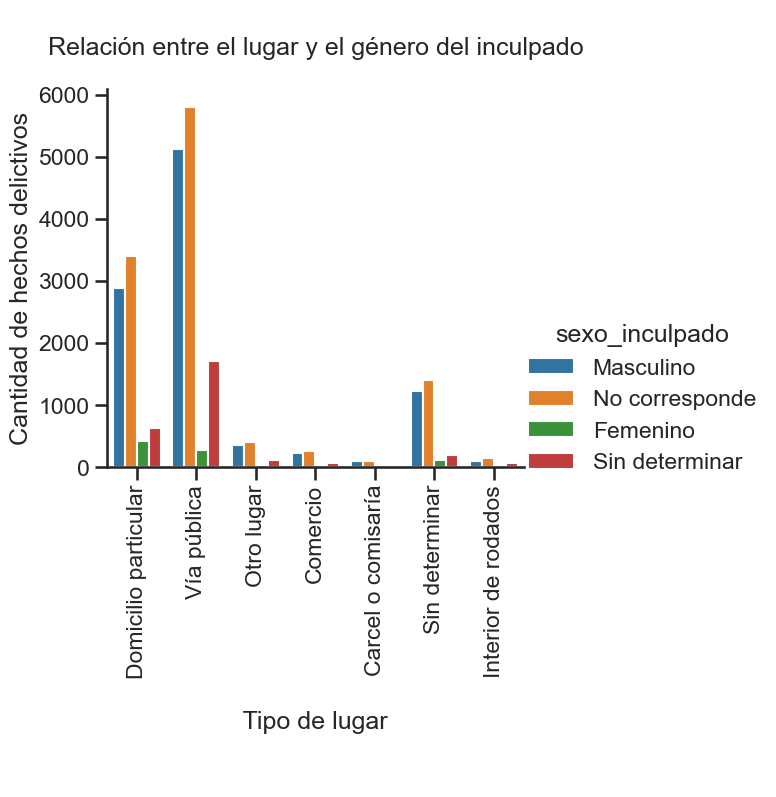

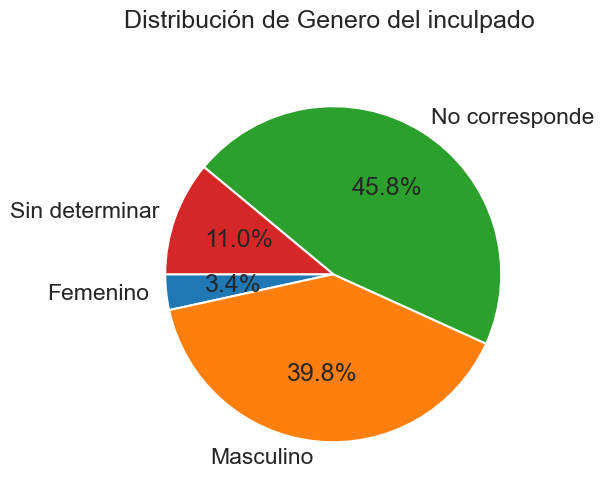

In [114]:
#crear gráfico de conteo para mostrar la relación entre el lugar y el género del inculpado 
sns.catplot(x="tipo_lugar", data=df_lugar_genero_i_delito, kind="count", hue="sexo_inculpado",aspect=1.2)
plt.xlabel('\n Tipo de lugar \n\n')
plt.ylabel('Cantidad de hechos delictivos')
plt.title('\n Relación entre el lugar y el género del inculpado \n')
plt.xticks(rotation=90)

plt.show()


# Agrupar por la columna 'sexo_inculpado' y obtener el conteo de ocurrencias
agrupado_genero = df_lugar_genero_i_delito.groupby('sexo_inculpado').size()

# Crear el gráfico de torta
grafico = agrupado_genero.plot.pie(autopct='%1.1f%%', startangle=180)

# Ajustar el aspecto del gráfico
plt.axis('equal')
plt.title('Distribución de Genero del inculpado \n\n')



# Mostrar el gráfico
plt.show()


## ¿Cantidad de hechos por año?, ¿cuáles son los 3 años con mayor número de delitos?

In [117]:
#Base de datos original
url_original='https://raw.githubusercontent.com/ianCristianAriel/proc_datos_proyecto_final_G3/visualizacion/datos/procesados/limpieza01_argentina_delitos.csv'


In [121]:
import pandas as pd
import matplotlib.pyplot as plt

df_original= pd.read_csv(url_original)

# Eliminar las filas duplicadas basadas en la columna 'Id_hecho'
df_original_sin_duplicar = df_original.drop_duplicates(subset='Id_hecho')

#Tomar los 10 lugares con mas cantidad de hechos delictivos

agrupado = df_original_sin_duplicar.groupby('anio').size()

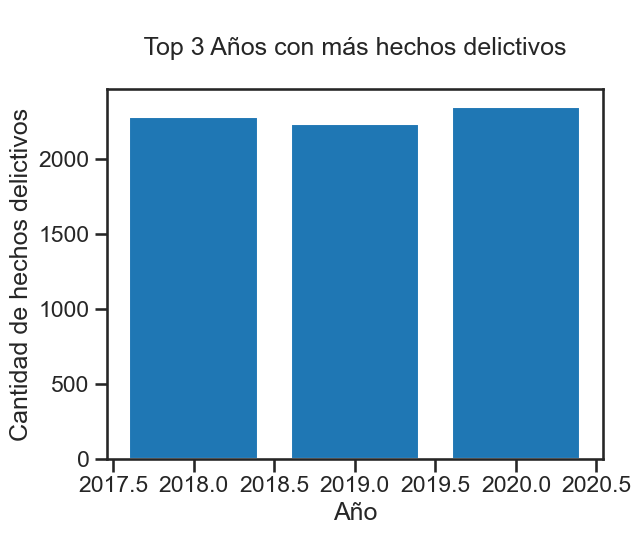

In [125]:
# Agrupar por la columna 'localidad' y obtener la cuenta de ocurrencias
agrupado = df_original_sin_duplicar.groupby('anio').size()

# Seleccionar los diez grupos con mayor cantidad de ocurrencias
top_3 = agrupado.nlargest(3)

# Crear el gráfico de barras
plt.bar(top_3.index, top_3.values)
plt.xlabel('Año')
plt.ylabel('Cantidad de hechos delictivos')
plt.title('\n Top 3 Años con más hechos delictivos \n')

# Mostrar el gráfico
plt.show()
